# **机器学习公开课 - 机器学习的未来：AutoML与超参数优化**
## Day 1 AutoML前沿进展与随机网格搜索

> 节选自《2021机器学习实战》正课<br>
> 作者：@菜菜TsaiTsai<br>
> 版本号：2021/12/03 V1<br>

# <font color="red">8点5分正式开始</font>

## 0 课程规划

欢迎来到为期三天的《机器学习的未来：AutoML与超参数优化》公开课。在这门课程中，我将用三天时间带你AutoML当前研究现状，并深入了解超参数优化算法中的网格优化与贝叶斯优化。当你完成这门课程时，你将能够自由应用数种网格搜索算法与数种贝叶斯优化算法，同时你将会了解AutoML领域所面临的挑战和机遇。如果想系统地学习更多超参数优化的信息，则可以向客服小可爱咨询正课《2021机器学习实战》。

**DAY 1：AutoML前沿进展与随机网格搜索**

**DAY 2：Halving网格搜索与经典贝叶斯优化**

**DAY 3：贝叶斯优化算法库精讲**

为掌握这门课程，你需要先掌握：
- Python基础 >> 《九天老师的Python基础》<br>https://www.bilibili.com/video/BV1U54y1W7jw?spm_id_from=333.999.0.0

- 机器学习基础 >> 《2021机器学习实战公开课》<br>包括超参数、泛化能力等基本概念<br>交叉验证等基本工具<br>随机森林等基本算法<br>https://www.bilibili.com/video/BV1f3411r7EP?share_source=copy_web

In [4]:
import sklearn
import matplotlib as mlp
import numpy as np
import pandas as pd
import re

In [24]:
for package in [sklearn,mlp,np,pd]:
    print(re.findall("([^']*)",str(package))[2],package.__version__)

sklearn 1.0.1
matplotlib 3.4.3
numpy 1.20.3
pandas 1.3.4


In [ ]:
#pip install --upgrade scikit-learn
#conda update scikit-learn

## 1 自动化机器学习AutoML

### 什么是AutoML？

在过去十年内，机器学习领域获得了巨大的进展，得益于互联网（数据）与芯片（算力）行业的快速发展，各类机器学习算法终于化理论为实践，被应用当各行各业、千家万户。如今，越来越多的科研领域依赖机器学习算法，机器学习算法的实现也因sklearn等算法库而变得轻便简单，但真正高水平的应用却很大程度依赖于机器学习算法工程师的经验。

**现代机器学习系统不止是关系到编程、数学等技能，更是伴随着众多基于经验和专业性的设计决策**，包括如何构筑特征、选择模型，如何设置超参数空间（parameter space）、如何设置神经网络结构、如何排布和管理数据处理管道（pipeline）等等。在实际的机器学习系统搭建过程当中，有超过80%的时间都在处理基于经验的设计决策，而决策所需的专业性拉开了算法工程专家与普通编程者的距离，也拉开了算法专业人员与业务人员的距离。

虽然机器学习领域的高专业性保障了算法工程师的稀缺性与高待遇，但在实际商业场景中，还有众多不关注机器学习技术细节、只关注机器学习产出成果的公司与个人，对他们而言，机器学习领域对专业知识的要求成为了巨大的门槛。无论一门技术多么先进，最终的目的还是要围绕业务场景、解决业务问题，而机器学习算法的核心价值也在于能够一定程度上代替人脑完成决策、完成部分思考流程的自动化。为了机器学习能够被更广泛地应用、更快速地发展，研究者们产生了**让机器学习完成机器学习建模流程中所需决策**的想法，正是一想法催生了自动化机器学习AutoML这一研究领域。

------------------------

**<center><font color=green>AutoML旨在让算法完成机器学习建模流程中所需的决策<br><br>AutoML的最终目标是让机器学习建模流程不再需要人工干预<br>或至少不再需要富有经验的机器学习专家的干预</font></center>**

------------------------

在整个建模流程中，可能自动化的步骤包括了：

- 数据预处理
- 特征构建/特征工程
- 模型选择
- 搭建神经网络架构
- 模型调参
- 模型融合
- 模型可视化

其中某些领域在自动化之后，甚至可能完全替代算法工程师的作用。围绕所有可能的领域，学者们艰难探索了数十年。随着人工智能的兴起，AutoML也取得了极大的进展，终于有了较为成熟的方法与工具。现在，AutoML已经是近年来机器学习领域最受关注的研究领域之一：

- 学术界
> - 2021年，google scholar上新增了2690篇autoML领域相关的论文
> - 光是在自动化神经网络架构领域，就有数百篇论文被发表
> - 学术研究中几乎不再出现手动调参方法
> - 自2014年以来，每两年会有一场AutoML或AutoDL大规模挑战赛
> - 第一届AutoML国际会议将在2022年夏季举办

从此AutoML不再是混迹在CVPR、ICML等大型会议上的小展台了。

- 工业界
> - 2周之前，华为天才少年钟钊公布了他们的首个AutoML大规模商用的成果
> - 微软（Azune）、谷歌、亚马逊都已经提出了各自的AutoML解决方案
> - 2018年，自动化设计的神经网络架构首次胜过人为设计的神经网络架构
> - 自动化神经网络架构设计已经是许多实验室/高科技公司的标准化技能

- 已实现的自动化框架
> - 自动化数据预处理框架：[MLBoX](https://github.com/AxeldeRomblay/MLBox)
> - 自动化模型选择框架：[H20 AutoML](http://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html)
> - 自动化超参数优化框架：[Bayesian Optimization](https://github.com/fmfn/BayesianOptimization)，[Hyperopt](https://github.com/hyperopt/hyperopt)，[DEAP](https://github.com/DEAP/deap)，[Optuna](https://github.com/optuna/optuna)
> - 自动化stacking融合：[AutoGluon](https://auto.gluon.ai/stable/index.html)
> - 自动化管道结构优化（基于遗传算法）：[TPOT](http://epistasislab.github.io/tpot/)
> - 自动化神经网络架构构建：[Auto-PyTorch](https://github.com/automl/Auto-PyTorch)，[AutoKeras](https://autokeras.com/)
> - 综合性自动化建模：[AutoWEKA](http://www.cs.ubc.ca/labs/beta/Projects/autoweka/)，[Auto-sklearn](https://automl.github.io/auto-sklearn/master/)，[hpsklearn](https://hyperopt.github.io/hyperopt-sklearn/)

In [ ]:
#示例代码，本段代码不提供运行

#安装
!pip install hpsklearn

#导入
from hpsklearn import HyperoptEstimator

#实例化
estim = HyperoptEstimator()

#训练
estim.fit(Xtrain, Ytrain)
prediction = estim.predict(Xtest)
score = estin.score(Xtest,Ytest)

#直接返回sklearn中存在的，选择出的最好模型
model = estim.best_model()

------------------------

**<center><font color=green>AutoML正在蓬勃发展，很可能即将迎来腾飞</font></center>**

**<center><font color=green>但在发展过程中，AutoML应用逐渐偏离了“非专业人士”的领域</font></center>**

------------------------

例如，业务人员或非专业人员恐怕很难在琳琅满目的第三方框架中选择适合当下项目的框架，同时非专业人员也无法辨别“自动化”究竟完成了哪些工作，还有哪些非自动化的流程需要完成，因此非专业人员只能够使用综合性自动化建模方案。然而：

- **AutoWEKA只支持Java**<br>
AutoWEKA底层是基于WEKA所构建，而WEKA只有Java才能调用，因此AutoWEKA拓展性较差，不适用Java以外语言

- **Auto-sklearn不支持windows**<br>
Auto-sklearn底层是基于linux中的resorce模块运行，因此不支持Windows系统，也不能完全支持Mac系统

- **hpsklearn缺乏维护，年久失修**<br>
hpsklearn底层是基于sklearn，代码简单但缺乏维护，年久失修，时至今日一些基本的代码（如fit）运行还会报错

更糟糕的是，自动化流程是脆弱的，为了能够让用户简单地进行调用，自动化框架往往封装程度很深，一旦框架本身不那么完美，自动化流程就非常容易崩溃。即便真的能够进行调试，无论是最简单的网格搜索，还是复杂的贝叶斯优化，底层都是复杂的数学理论。即便对于机器学习算法工程师来说，AutoML算法背后的原理都令人望而生畏，更不要提完全不理解机器学习的非专业人员了。

### AutoML的三大成熟研究领域

- **超参数优化HPO**（HyperParameter Optimization）

超参数优化是AutoML领域中最成熟、最深入、也是最知名的方向。每一个机器学习算法都会有超参数，而超参数的设置很大程度上影响了算法实际的使用效果，因此调参是机器学习算法工程师最为基础和重要的任务。**理论上来说，当算力与数据足够时，HPO的性能一定是超过人类的**。HPO能够降低人为工作量，并且HPO得出的结果比认为搜索的复现可能性更高，所以HPO可以极大程度提升科学研究的复现性和公平性。当代超参数优化算法主要可以分为：

> 基于网格的各类搜索（Grid）<br>
> 基于贝叶斯优化的各类优化算法（Baysian）<br>
> 基于梯度的各类优化（Gradient-based）<br>
> 基于进化算法的各类优化（Evolutionary Optimzation）

- **神经网络架构搜索NAS**（Neural Architecture Search）

神经网络架构搜索解决深度学习世界当中最关键的问题之一：如何寻找性能良好的深度神经网络架构。与机器学习领域不同，深度学习领域没有一统天下的算法架构，面临任意学习任务，深度学习算法工程师都必须找出适应当前数据和业务的架构。自动化架构搜索可以大大加快新的深度学习应用程序的开发，因为开发人员终于不需要煞费苦心地评估不同的架构了。

- **元学习**（Meta-Learning）

元学习是一种基于其他任务的经验进行学习的方法。人类在学习新知识时，总是会或多或少地借助以前学习过的相关知识。例如，当你学习游泳时，你并不需要从“什么是水”开始，你已经自然地理解了“什么是水”，“水下不能呼吸”、“人下水会沉”等基本信息，然后就可以从“如何漂浮”以及“如何在水下换气”开始学习。

但对机器学习算法来说，每次学习都是从0开始，在接触训练数据之前，机器学习算法不会有任何“相关经验和理解”。元学习就是赋予机器学习算法“相关经验”的方法。在元学习中，我们一般会先让算法学习与目标任务相关的其他任务或其他信息，以获得能够知道检索新任务最优模型的相关知识，然后再在目标任务上进行训练。这一手段被广泛地应用于HPO和NAS领域，同时深度学习中的“迁移学习”也于元学习有异曲同工之妙。

在实际应用中，原学习可以被用于以下任务：

> HPO&NAS<br>
> 算法预测<br>
> 模型选择<br>
> 算法构建（L2L）

### AutoML的新兴研究领域

- **交互式可解释性机器学习ixAutoML**（Interactive and Explainable AutoML）

大部分AutoML框架封装程度很深、许多AutoML算法还是黑箱算法，因此无论是机器学习工作者、还是非专业人士，都不太信任AutoML的结果。ixAutoML是研究自动化解释模型、自动化可视化的领域，旨在增强专业人员对AutoML的信任感，增强AutoML的透明程度。该领域已经发展了一段时间，目前为止最先进的研究能够可视化参数变化对模型整体的影响。

- **绿色AI**（Green AI）

AutoML最关键的问题之一是巨大的计算量。当人工神经网络、boosting算法等超参数众多的算法被应用当工业当中，巨量的数据、巨量的超参数让AutoML对算力的要求很高。绿色AI旨在自动研发低参数量、低超参量、但性能优越的算法。这个领域目前刚刚萌芽。

- **非线性流程优化**

无论我们如何“自动化”机器学习，在调参和模型选择中都会有一个巨大的争议：有的模型在没有调参之前结果不佳，但是调参之后可能得到很好的结果，有的模型在调参之前结果很好，但是调参之后未必能得到很好的结果。但在自动化过程中，我们一定是先选择模型，再调节参数，因此具有强大调参潜力的模型反而容易在自动化过程中被筛选掉。现在的技术已经支持对多个模型同时调参，并最终选择调参后结果最佳的模型，但这样又会需要大量计算资源与计算时间。如何快速解决模型选择与调参顺序所导致的问题，是现代autoML关键的课题。

### AutoML真的会替代算法工程师吗？

<font color="red">**短时间内一定不会**</font>。在爆发新一轮技术突破之前，AutoML还不能替代算法工程师。相对的，AutoML是辅助算法工程师的关键工具。有以下几个原因：

- 适用于业务人员的AutoML框架还不成熟，并且全流程框架方面的研究也未见起色。<br><br>
- 在较大的、复杂的模型（如深度学习，boosting）或者较大的数据集上，AutoML求解虽然准确，但运算代价机器巨大。为节约成本，autoML过程必须经过算法工程师的优化和干涉。在NAS领域，神经网络架构一般也不会从0开始搜索，如何选择正确的备选项，依然依赖于算法工程师的专业知识。<br><br>
- 数据/业务问题的复杂程度目前依然超出AutoML的处理范围，AutoML只能够适用于较为固定的场景例如，损失函数不平滑、或损失函数不是凸函数时，AutoML的优化算法会失效。<br>

## 2 超参数优化HPO方法

### 1 枚举网格搜索（Exhaustive Grid Search）

- 基本原理

在所有超参数优化的算法当中，枚举网格搜索是最为基础和经典的方法。在搜索开始之前，我们需要人工将每个超参数的备选值一一列出，多个不同超参数的不同取值之间排列组合，最终将组成一个参数空间（parameter space）。枚举网格搜索算法会将这个参数空间当中**所有的参数组合**带入模型进行训练，最终选出泛化能力最强的组合作为模型的最终超参数。

当衡量模型的“泛化能力”时，我们往往会使用交叉验证输出指标的均值和方差，因此超参数优化算法总是与网格搜索密不可分。

在进行网格搜索之前，我们需要先确认进行搜索的参数空间。所谓**参数空间**，就是备选参数所构成的空间。以随机森林算法为例，假设我们要调整n_estimators与max_depth，且n_estimators的备选范围是[50,100,150,200,250,300]，max_depth的备选范围是[2,3,4,5,6]，则两个参数可以构成如下二维空间。

In [304]:
import matplotlib
import matplotlib.pyplot as plt

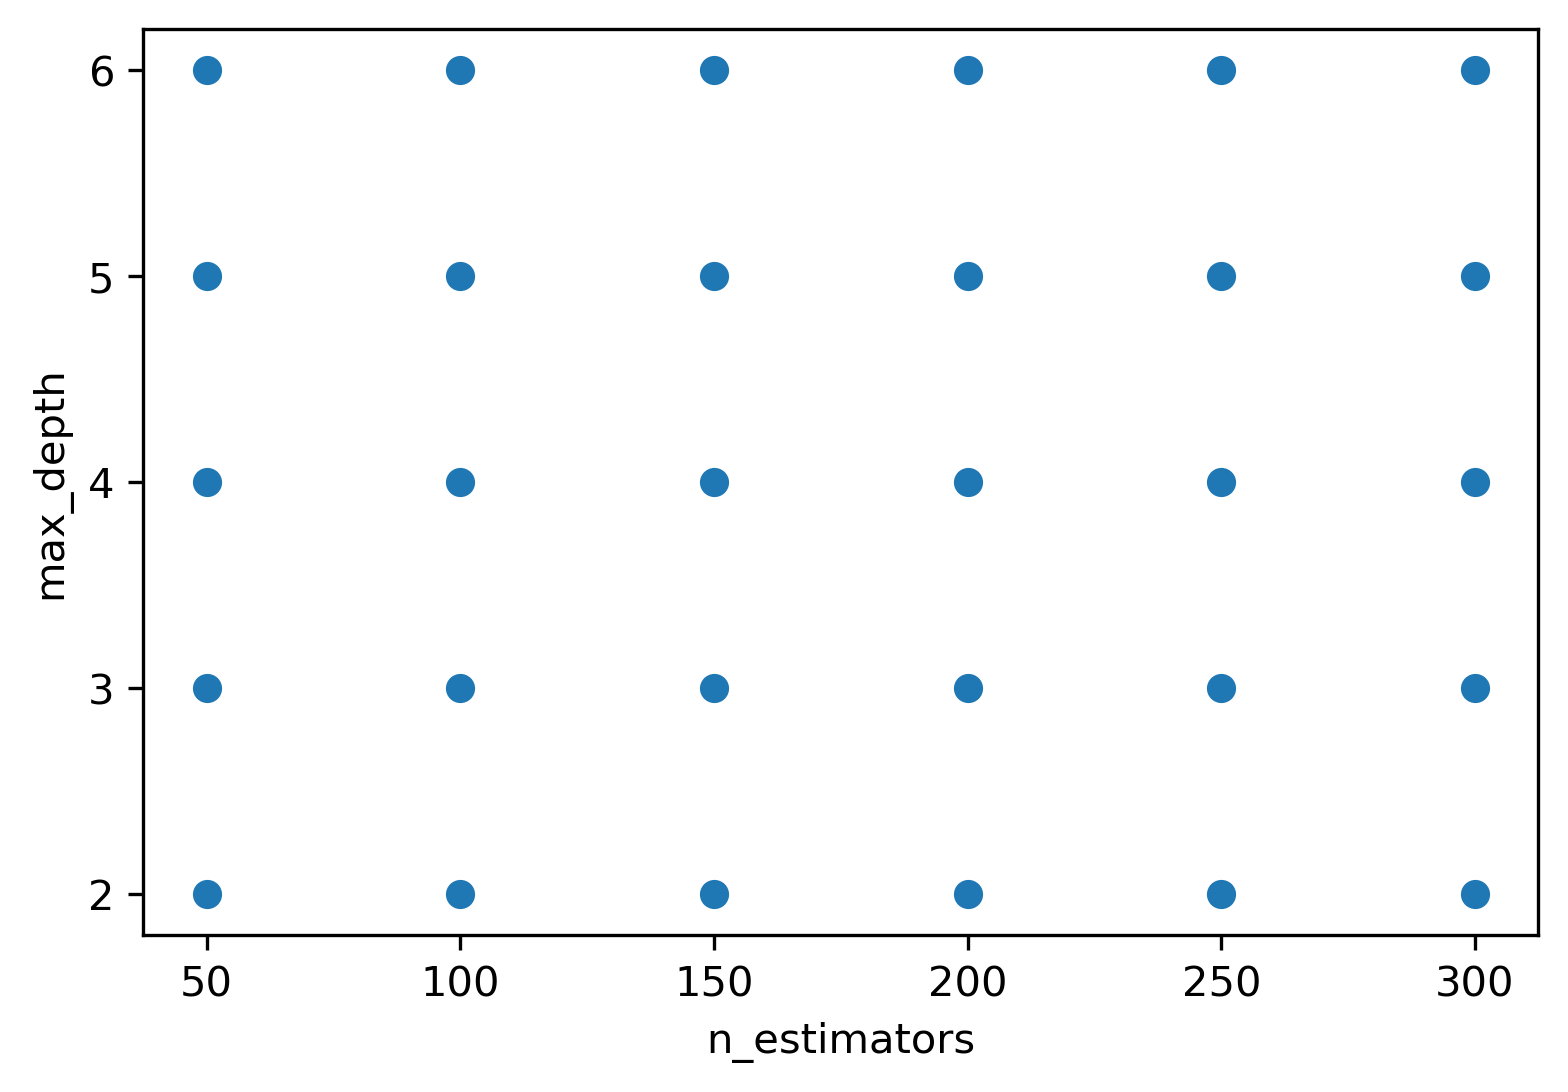

In [305]:
n_e_list = [*range(50,350,50)]
m_d_list = [*range(2,7)]
comb = pd.DataFrame([(n_estimators, max_depth) for n_estimators in n_e_list for max_depth in m_d_list])
plt.figure(dpi=300)
plt.scatter(comb.iloc[:,0],comb.iloc[:,1],cmap="Blues")
plt.xticks([*range(50,350,50)])
plt.yticks([*range(2,7)])
plt.xlabel("n_estimators")
plt.ylabel("max_depth");

假设我们要调整n_estimators，max_depth与min_sample_split，且min_sample_split的备选参数为[2,3,4,5]，则三个参数可以构成如下三维空间：

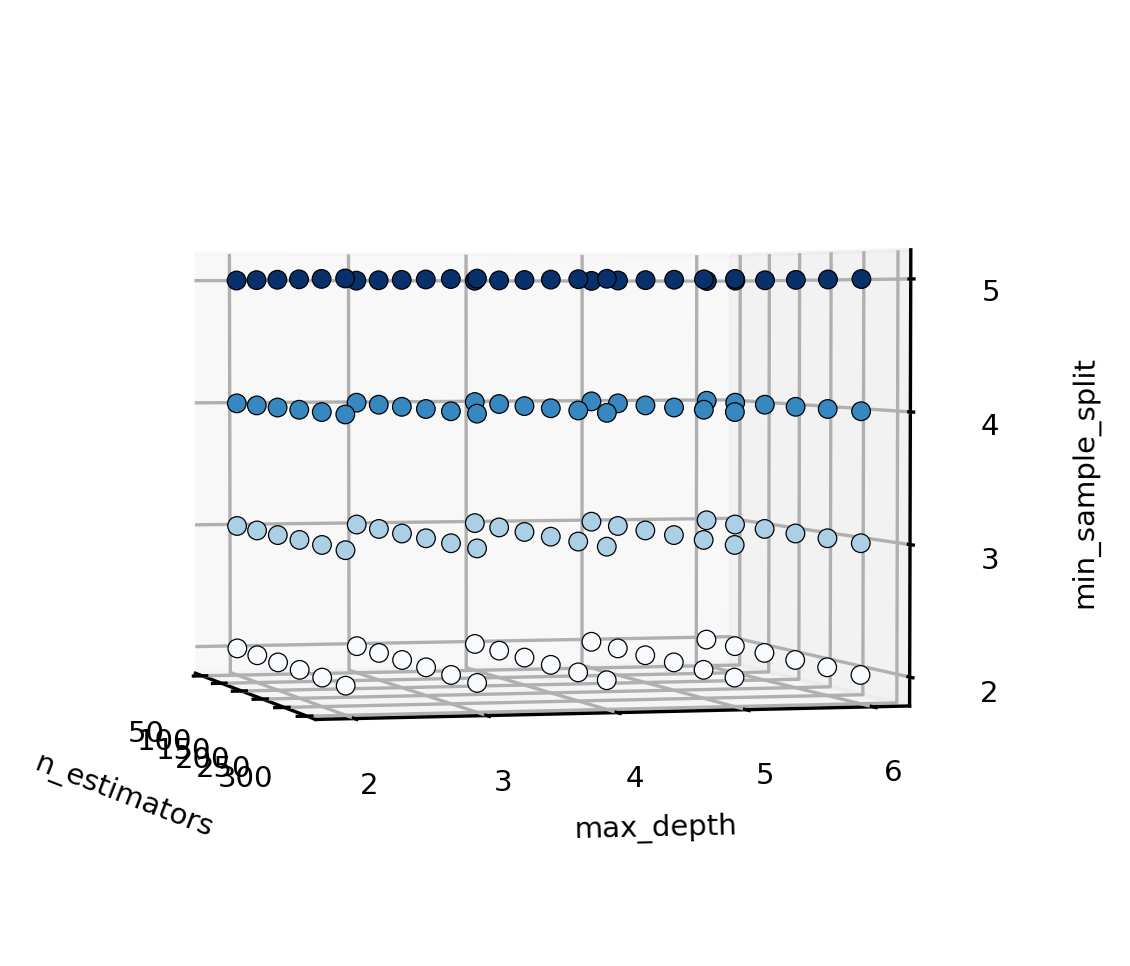

In [306]:
m_s_s_list = [2,3,4,5]
X,Y,Z = np.meshgrid(n_e_list,m_d_list,m_s_s_list)
plt.figure(dpi=300)
ax = plt.axes(projection="3d")
ax.view_init(2, -15)
#ax.view_init(90, -30)
ax.scatter(X,Y,Z,c=Z,cmap="Blues",edgecolor="k",linewidth=0.3,s=20,alpha=1);
ax.set_xticks([*range(50,350,50)])
ax.set_yticks([*range(2,7)])
ax.set_zticks([2,3,4,5])
plt.xlabel("n_estimators",fontsize=7)
plt.ylabel("max_depth",fontsize=7)
ax.set_zlabel("min_sample_split",fontsize=7)
ax.zaxis.set_tick_params(labelsize=7)
ax.xaxis.set_tick_params(labelsize=7)
ax.yaxis.set_tick_params(labelsize=7);

在参数空间中，每一个点就是一组参数的组合，枚举网格搜索的目标就是从空间中挑选出最好的参数组合。因此，枚举网格搜索会对空间中每一个点进行建模，以找出令模型整体损失函数最小、泛化能力最强的组合。

P.S. 广义的来说，参数空间中的超参数也可以是评估器，也可以是某个预处理流程中的参数。因此只要编码得当，网格搜索可以被用于模型选择，甚至是自动化预处理。

- 实现枚举网格搜索

在sklearn当中，我们可以很容易地实现网格搜索，以随机森林回归器为例：

*class*`sklearn.model_selection.GridSearchCV`(estimator, param_grid, *, scoring=None, n_jobs=None, refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)

全部参数如下所示，其中加粗的是需要高度关注的参数：

|Name|Description|      
|:--:|:--:|      
|**estimator**|调参对象，某评估器|      
|**param_grid**|参数空间，可以是字典或者字典构成的列表，稍后介绍参数空间的创建方法|	      
|**scoring**|评估指标，支持同时输出多个参数|
|**n_jobs**|设置工作时参与计算的线程数|
|refit|挑选评估指标和最佳参数，在完整数据集上进行训练|
|**cv**|交叉验证的折数|
|verbose|输出工作日志形式|
|pre_dispatch|多任务并行时任务划分数量|
|error_score|当网格搜索报错时返回结果，选择'raise'时将直接报错并中断训练过程，其他情况会显示警告信息后继续完成训练|
|return_train_score|在交叉验证中是否显示训练集中参数得分|

1、导入数据

In [307]:
import time #计时模块time
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.model_selection import KFold, GridSearchCV

In [293]:
def RMSE(cvresult,key):
    return (abs(cvresult[key])**0.5).mean()

In [308]:
data = pd.read_csv(r"D:\Pythonwork\2021ML\PART 2 Ensembles\datasets\House Price\train_encode.csv",index_col=0)

In [309]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [310]:
X.shape

(1460, 80)

In [314]:
X.columns.tolist()

['Id',
 '住宅类型',
 '住宅区域',
 '街道接触面积(英尺)',
 '住宅面积',
 '街道路面状况',
 '巷子路面状况',
 '住宅形状(大概)',
 '住宅现状',
 '水电气',
 '住宅配置',
 '住宅视野',
 '社区',
 '住宅周边1',
 '住宅周边2',
 '适用家庭',
 '住宅房型',
 '装修质量',
 '整体质量',
 '建造年份',
 '法律拆除年份',
 '天花板类型',
 '天花板材料',
 '户外装饰1',
 '户外装饰2',
 '砖墙类型',
 '砖墙面积',
 '户外材料质量',
 '户外装修质量',
 '地下室类型',
 '地下室深度',
 '地下室质量',
 '花园外墙',
 '地下室现状1',
 '地下室一层标准面积',
 '地下室现状2',
 '地下室二层标准面积',
 '地下室建造现状',
 '整体地下室面积',
 '暖气类型',
 '暖气质量',
 '中央空调',
 '电力系统',
 '二楼面积',
 '三楼面积',
 '全低质量面积',
 '户外活动空间面积',
 '全卫地下室',
 '半卫地下室',
 '全卫及以上',
 '半卫及以上',
 '卧室及以上',
 '厨房及以上',
 '厨房质量',
 '总房间量',
 '住宅性能',
 '壁炉数量',
 '壁炉质量',
 '车库类型',
 '车库建造时间',
 '车库装修现状',
 '车位数量',
 '车库面积',
 '车库质量',
 '车库现状',
 '石板路',
 '木板面积',
 '开放式门廊面积',
 '关闭式门廊面积',
 '三季门廊面积',
 '半开放式门廊面积',
 '泳池面积',
 '泳池质量',
 '篱笆质量',
 '其他配置',
 '其他配置的价值',
 '销售月份',
 '销售年份',
 '销售类型',
 '销售状态']

In [311]:
y.describe() #MSE，RMSE

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [312]:
X.head()

,Id,住宅类型,住宅区域,街道接触面积(英尺),住宅面积,街道路面状况,巷子路面状况,住宅形状(大概),住宅现状,水电气,...,半开放式门廊面积,泳池面积,泳池质量,篱笆质量,其他配置,其他配置的价值,销售月份,销售年份,销售类型,销售状态
0,0.0,5.0,3.0,36.0,327.0,1.0,0.0,3.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,8.0,4.0
1,1.0,0.0,3.0,51.0,498.0,1.0,0.0,3.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,8.0,4.0
2,2.0,5.0,3.0,39.0,702.0,1.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8.0,2.0,8.0,4.0
3,3.0,6.0,3.0,31.0,489.0,1.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8.0,0.0
4,4.0,5.0,3.0,55.0,925.0,1.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,11.0,2.0,8.0,4.0


2、创建参数空间

In [35]:
param_grid_simple = {'n_estimators': [*range(5,100,5)]
                     , 'max_depth': [*range(25,36,2)]
                     , "max_features": ["log2","sqrt","auto"]
                    }

3、实例化用于搜索的评估器、交叉验证评估器与网格搜索评估器

In [36]:
reg = RFR(random_state=1412,verbose=True,n_jobs=12)

cv = KFold(n_splits=5,shuffle=True,random_state=1412)

search = GridSearchCV(estimator=reg
                     ,param_grid=param_grid_simple
                     ,scoring = "neg_mean_squared_error" #MSE
                     ,verbose = True
                     ,cv = cv
                     ,n_jobs=12)

4、训练网格搜索评估器

In [37]:
#=====【TIME WARNING: 5~10min】=====#
start = time.time()
search.fit(X,y)
print(time.time() - start)

Fitting 5 folds for each of 342 candidates, totalling 1710 fits
53.38564848899841


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  45 out of  45 | elapsed:    0.0s finished


5、查看结果

In [33]:
search.best_estimator_

RandomForestRegressor(max_depth=33, max_features='log2', n_estimators=45,
                      n_jobs=12, random_state=1412, verbose=True)

In [34]:
abs(search.best_score_)**0.5 #RMSE

29840.676988215626

- 枚举网格搜索的理论极限

如果参数空间中的某一个点指向了损失函数真正的最小值，那枚举网格搜索时一定能够捕捉到该最小值以及对应的参数（相对的，假如参数空间中没有任意一点指向损失函数真正的最小值，那网格搜索就一定无法找到最小值对应的参数组合）

而参数空间越大、越密，参数空间中的组合刚好覆盖损失函数最小值点的可能性就会越大。**这是说，极端情况下，当参数空间穷尽了所有可能的取值时，网格搜索一定能够找到损失函数的最小值所对应的最优参数组合，且该参数组合的泛化能力一定是强于人工调参的**。

- 枚举网格搜索的限制：算力与时间

但是，参数空间越大，网格搜索所需的算力和时间也会越大，当参数维度上升时，网格搜索所需的计算量更是程指数级上升的：

只有1个参数n_estimators，备选范围是[50,100,150,200,250,300]，需要建模**6**次。<br>
增加参数max_depth，且备选范围是[2,3,4,5,6]，需要建模**30**次。<br>
增加参数min_sample_split，且备选范围为[2,3,4,5]，需要建模**120**次。<br>

同时，参数优化的目标是找出令模型泛化能力最强的组合，因此需要交叉验证来体现模型的泛化能力，假设交叉验证次数为5，则三个参数就需要建模600次。在面对超参数众多、且超参数取值可能无限的人工神经网络、融合模型、集成模型时，伴随着数据和模型的复杂度提升，网格搜索所需要的时间会急剧增加，完成一次枚举网格搜索可能需要耗费几天几夜。因此当我们使用网格搜索时，要尽量精简参数空间，以节约计算资源。

### 2 随机网格搜索（Random Grid Search）

- 基本原理

在讲解网格搜索时我们提到，伴随着数据和模型的复杂度提升，网格搜索所需要的时间急剧增加。对于刚才尝试的随机森林算法，如果使用过w的数据，搜索时间则会立刻上升好几个小时。考虑到后续实践过程中，算法和数据都将更加复杂，而建模过程中超参数调优是模型训练的必备环节，因此，我们急需寻找到一种更加高效的超参数搜索方法。

首先，当所使用的算法确定时，决定枚举网格搜索运算速度的因子一共有两个：

> 1 参数空间的大小：参数空间越大，需要建模的次数越多<br>
> 2 数据量的大小：数据量越大，每次建模时需要的算力和时间越多<br>

因此，sklearn中的网格搜索优化方法主要包括两类，其一是**调整搜索空间**，其二是调整**每次训练的数据**。其中，调整参数空间的具体方法，是放弃原本的搜索中必须使用的全域超参数空间，改为挑选出部分参数组合，构造超参数子空间，并只在子空间中进行搜索。以下图的二维空间为例，枚举网格搜索必须对30种参数组合都进行搜索，而调整搜索空间之后，我们只抽样出橙色的参数组合作为“子空间”，并只对橙色参数组合进行搜索。如此一来，整体搜索所需的计算量就大大下降了，原本需要30次建模，现在只需要8次建模。

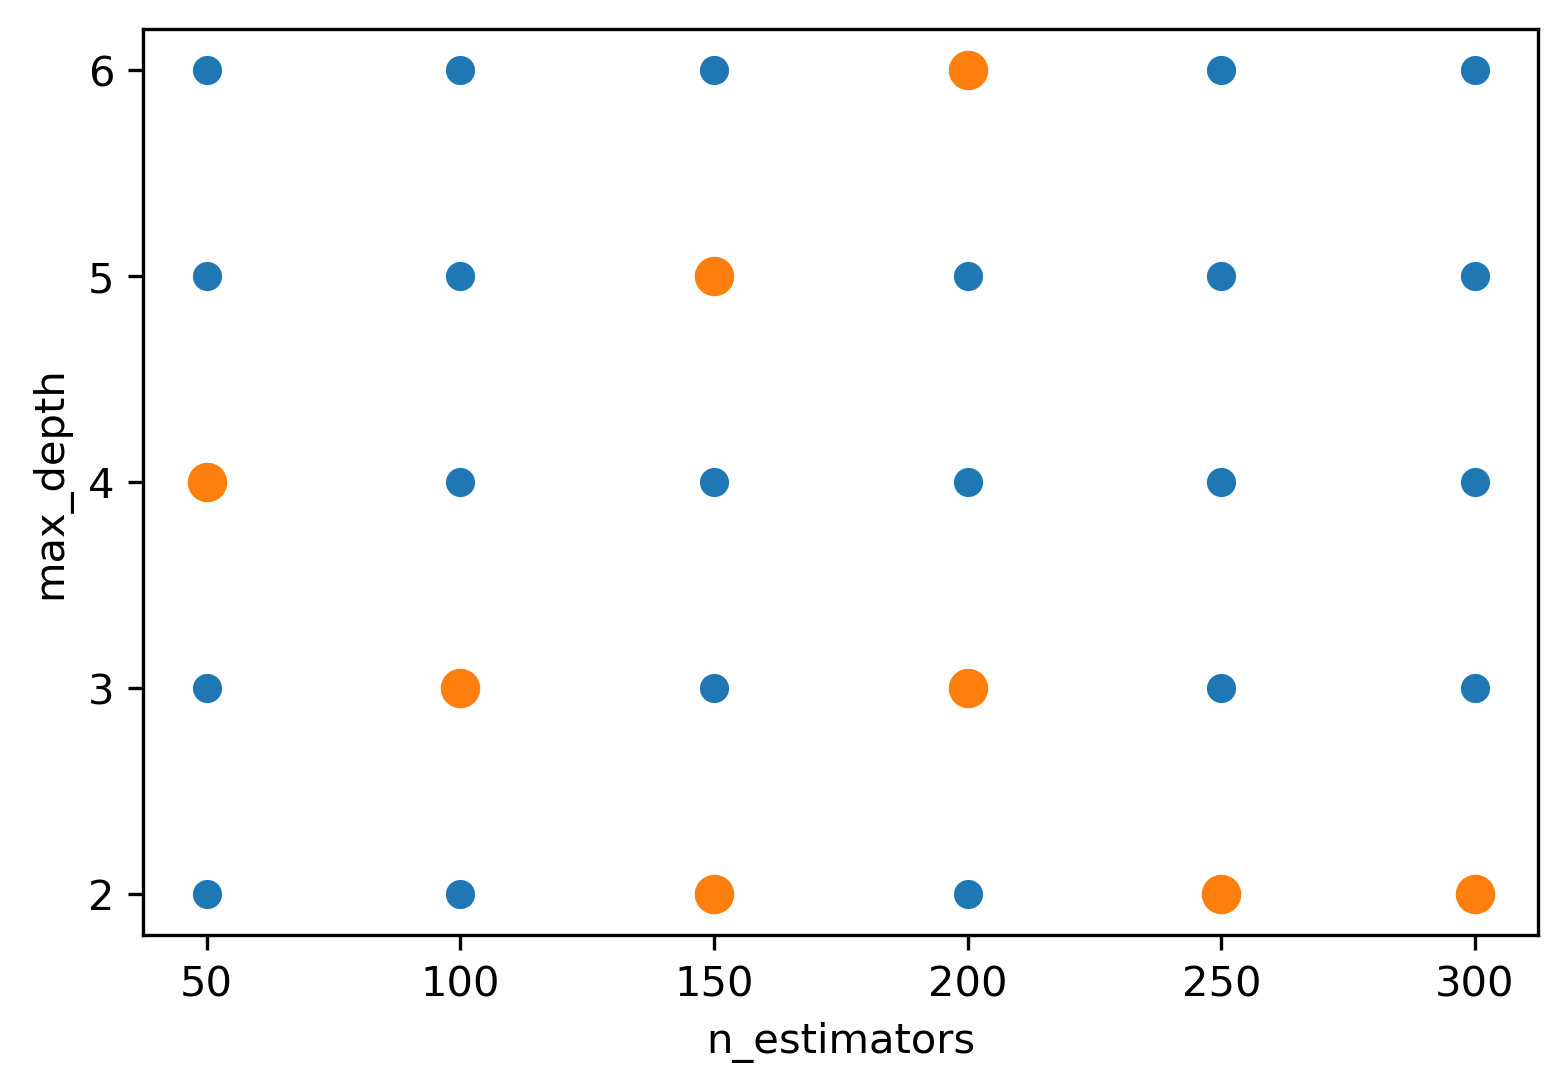

In [69]:
n_e_list = [*range(50,350,50)]
m_d_list = [*range(2,7)]
comb = pd.DataFrame([(n_estimators, max_depth) for n_estimators in n_e_list for max_depth in m_d_list])
plt.figure(dpi=300)
plt.scatter(comb.iloc[:,0],comb.iloc[:,1],cmap="Blues")
plt.scatter([50,250,200,200,300,100,150,150],[4,2,6,3,2,3,2,5],cmap="red",s=20,linewidths=5)
plt.xticks([*range(50,350,50)])
plt.yticks([*range(2,7)])
plt.xlabel("n_estimators")
plt.ylabel("max_depth");

在sklearn中，随机抽取参数子空间并在子空间中进行搜索的方法叫做随机网格搜索RandomizedSearchCV。由于搜索空间的缩小，需要枚举和对比的参数组的数量也对应减少，整体搜索耗时也将随之减少，因此随机网格搜索的速度比枚举网格搜索快很多。

不过，需要注意的是，**随机网格搜索在实际运行时，并不是先抽样出子空间，再对子空间进行搜索**，而是仿佛“循环迭代”一般，在一次次迭代随机抽取1组参数进行建模，下一次迭代再随机抽取1组参数进行建模，这种随机抽样是不放回的。我们可以控制随机网格搜索的迭代次数，来控制整体被抽出的参数子空间的大小。

- 随机网格搜索的实现

In [18]:
from sklearn.model_selection import RandomizedSearchCV

*class* `sklearn.model_selection.RandomizedSearchCV`(estimator, param_distributions, \*, n_iter=10, scoring=None, n_jobs=None, refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', random_state=None, error_score=nan, return_train_score=False)

全部参数解读如下，其中加粗的是随机网格搜索独有的参数：

|Name|Description|      
|:--:|:--:|      
|estimator|调参对象，某评估器|      
|param_distributions|全域参数空间，可以是字典或者字典构成的列表|
|**n_iter**|迭代次数，迭代次数越多，抽取的子参数空间越大|
|scoring|评估指标，支持同时输出多个参数|
|n_jobs|设置工作时参与计算的线程数|
|refit|挑选评估指标和最佳参数，在完整数据集上进行训练|
|cv|交叉验证的折数|
|verbose|输出工作日志形式|
|pre_dispatch|多任务并行时任务划分数量|
|**random_state**|随机数种子|
|error_score|当网格搜索报错时返回结果，选择'raise'时将直接报错并中断训练过程，其他情况会显示警告信息后继续完成训练|
|return_train_score|在交叉验证中是否显示训练集中参数得分|

我们依然借用之前已经建立好的数据X与y，以及随机森林回归器，来实现随机网格搜索：

In [72]:
X.shape

(1460, 80)

In [73]:
y.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [286]:
#创造参数空间 - 使用与网格搜索时完全一致的空间
param_grid_simple = {'n_estimators': [*range(5,100,5)]
                     , 'max_depth': [*range(25,36,2)]
                     , "max_features": ["log2","sqrt","auto"]
                    }

#建立回归器、交叉验证
reg = RFR(random_state=1412,verbose=True,n_jobs=12)
cv = KFold(n_splits=5,shuffle=True,random_state=1412)

In [290]:
#计算全域参数空间大小
len([*range(5,100,5)]) * len([*range(25,36,2)]) * 3

342

In [291]:
#定义随机搜索
search = RandomizedSearchCV(estimator=reg
                            ,param_distributions=param_grid_simple
                            ,n_iter = 180 #子空间的大小是全域空间的一半
                            ,scoring = "neg_mean_squared_error"
                            ,verbose = True
                            ,cv = cv
                            ,n_jobs=12)

In [298]:
#训练随机搜索评估器
#=====【TIME WARNING: 5~10min】=====#
start = time.time()
search.fit(X,y)
print(time.time() - start)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
32.43994474411011


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  45 out of  45 | elapsed:    0.0s finished


In [301]:
#查看模型结果
search.best_estimator_

RandomForestRegressor(max_depth=35, max_features='log2', n_estimators=45,
                      n_jobs=12, random_state=1412, verbose=True)

In [302]:
abs(search.best_score_)**0.5

29845.83915991588

很明显，在相同参数空间、相同模型的情况下，随机网格搜索的运算速度是普通网格搜索的一半，当然，这与子空间是全域空间的一半有很大的联系。由于随机搜索只是降低搜索的次数，并非影响搜索过程本身，因此其运行时间基本就等于n_iter/全域空间组合数 * 网格搜索的运行时间。

- 随机网格搜索的理论极限

虽然通过缩小子空间可以提升搜索的速度，但是随机网格搜索的精度看起来并没有削减太多，随机网格搜索可以得到和网格搜索一样好的结果吗？它也像网格搜索一样，可以得到最优的参数组合吗？为什么缩小参数空间之后，随机网格搜索的结果还与网格搜索一致？

从直觉上来说，我们很难回答这些问题，但我们可以从数学的随机过程的角度来理解这个问题。在机器学习算法当中，有非常多通过随机来降低运算速度（比如Kmeans，随机挑选样本构建簇心）、或通过随机来提升模型效果的操作（比如随机森林，比如小批量随机梯度下降）。随机网格搜索属于前者，而它能够有效的根本原因在于：

> - **抽样出的子空间反馈出与全域空间相似的分布**<br>
> - **子空间越大，子空间与全域空间越相似**<br>
> - **在与全域空间相似的空间中，随机搜索即便不能找到真正的最小值，也能找到与最小值高度接近的某一个次小值**<br>

如果全域空间包括了理论上的损失函数最小值，那一个与全域空间分布高度相似的子空间很可能也包括损失函数的最小值，或包括非常接近最小值的一系列值。

我们可以绘图进行查看：

In [42]:
from mpl_toolkits.mplot3d import axes3d

In [103]:
p1, p2, MSE = axes3d.get_test_data(0.05)
#假设现在有两个参数，p1与p2，两个参数组成的参数组合对应着损失函数值MSE
#参数0.05是指参数空间中，点与点之间的距离
#因此该数字越小，取出来的样本越多

In [99]:
len(p1) #参数1有120个取值

120

In [100]:
len(p2) #Y也有120个取值

120

In [101]:
MSE.shape #排列组合，则有120*120 = 14400个取值结果

(120, 120)

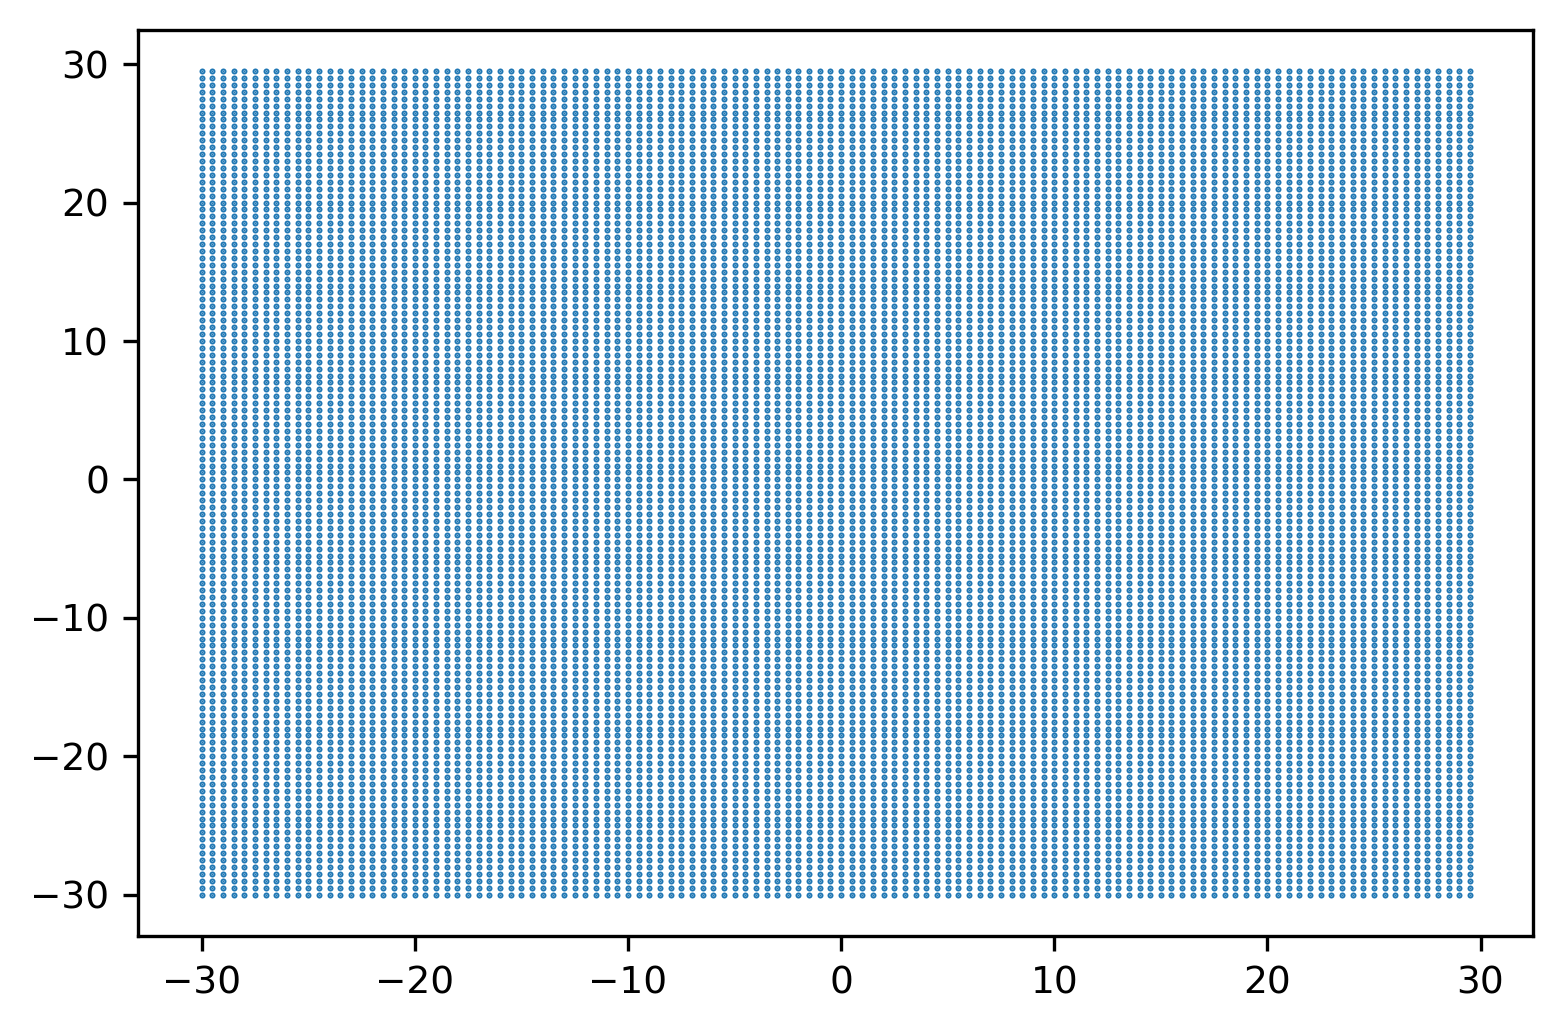

In [102]:
#参数空间
plt.figure(dpi=300)
plt.scatter(p1,p2,s=0.2)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9);

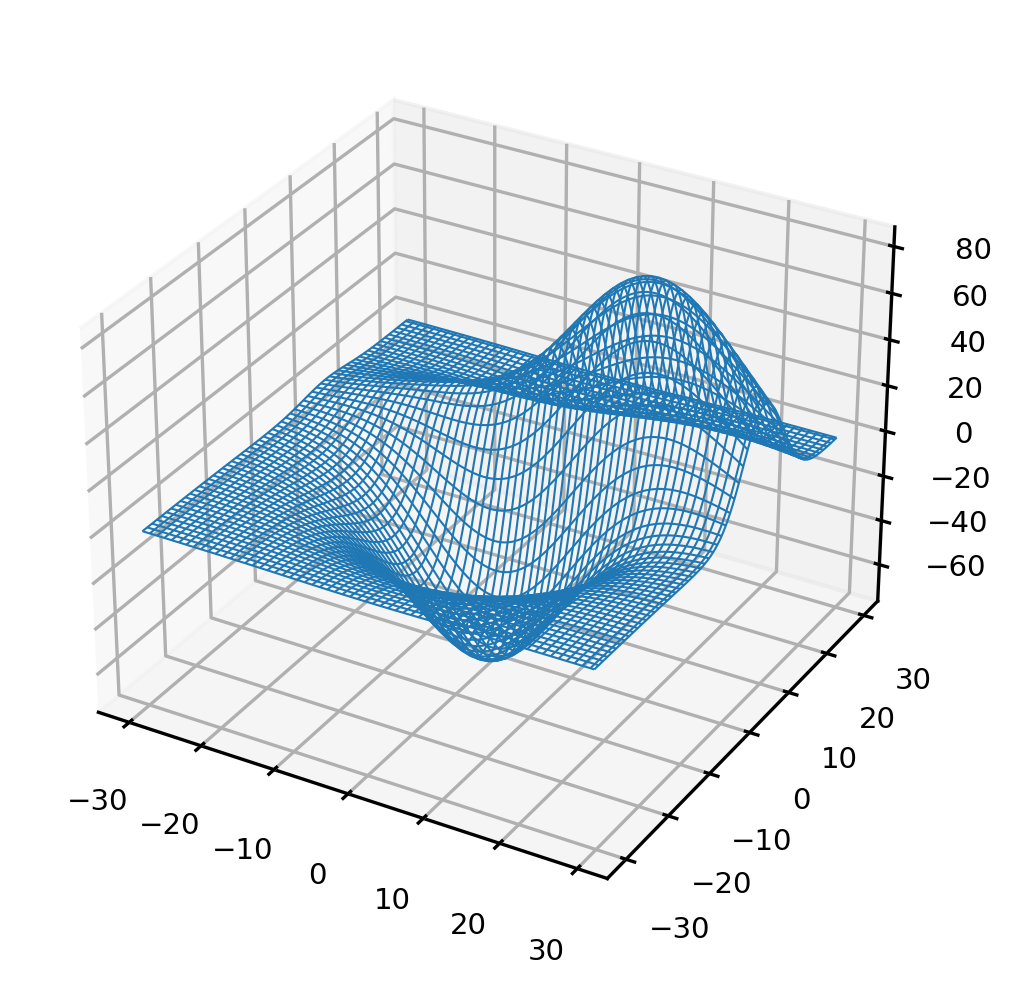

In [104]:
#参数与损失共同构建的函数
plt.figure(dpi=300)
ax = plt.axes(projection="3d")
ax.plot_wireframe(p1,p2,MSE,rstride=2,cstride=2,linewidth=0.5)
ax.zaxis.set_tick_params(labelsize=7)
ax.xaxis.set_tick_params(labelsize=7)
ax.yaxis.set_tick_params(labelsize=7);

In [51]:
np.min(MSE) #整个参数中，可获得的MSE最小值是-73.39

-73.39620971601681

In [107]:
#现在，我们从该空间上抽取子空间
import numpy as np

In [248]:
#我们从空间中抽取n个组合，n越大子空间越大
#现在总共有14400个组合

n = 10000

-73.38392510772172


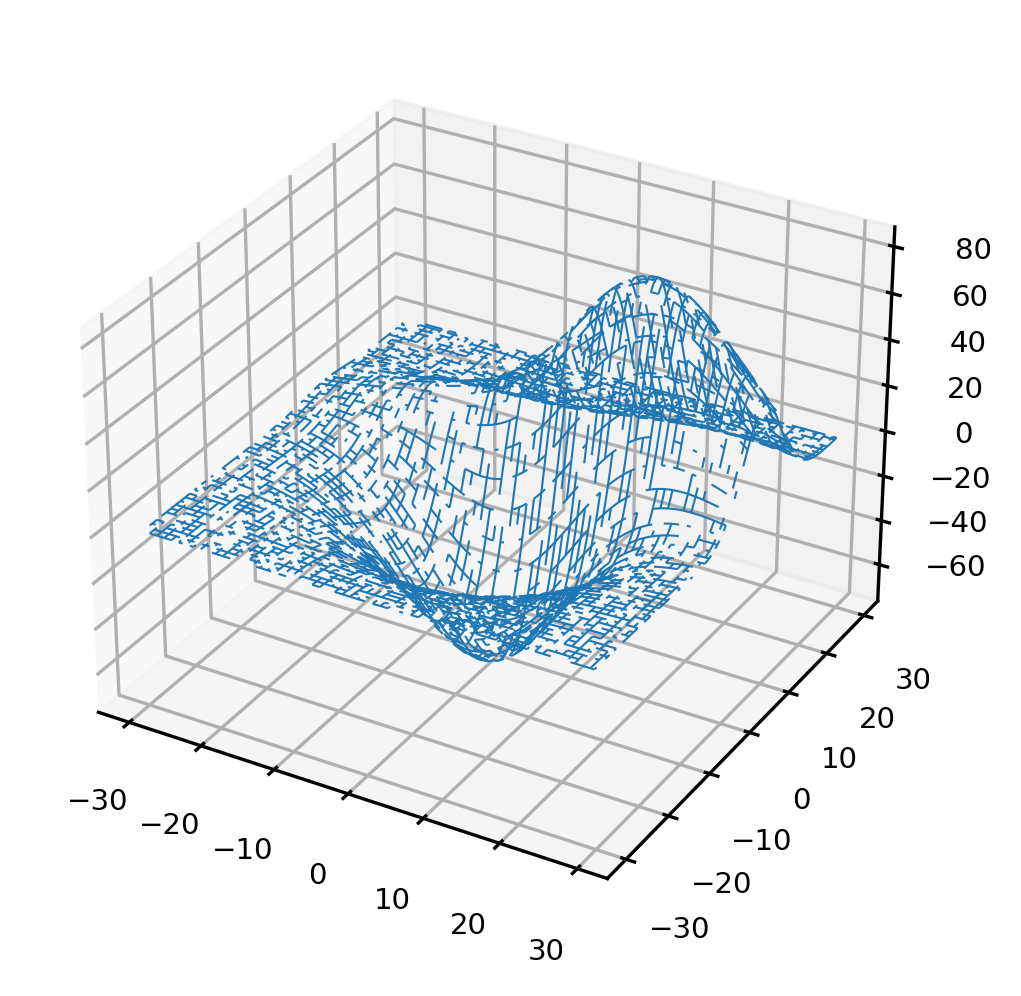

In [276]:
unsampled = np.random.randint(0,14400,14400-n)
                                
p1, p2, MSE = axes3d.get_test_data(0.05)
MSE = MSE.ravel()
MSE[unsampled] = np.nan #没有被抽出的样本，我们让损失函数值为空
MSE = MSE.reshape((120,120))

#参数与损失共同构建的函数
plt.figure(dpi=300)
ax = plt.axes(projection="3d")
ax.plot_wireframe(p1,p2,MSE,rstride=2,cstride=2,linewidth=0.5)
ax.zaxis.set_tick_params(labelsize=7)
ax.xaxis.set_tick_params(labelsize=7)
ax.yaxis.set_tick_params(labelsize=7);

#求出当前损失函数上的最小值
MSE = MSE.ravel().tolist()
MSE = [x for x in MSE if str(x) != 'nan']
print(np.min(MSE))

很容易发现，当抽取的子空间越大时，子空间的分布会与全域空间越来越相似。同时，即便抽取的子空间非常小，子空间中的分布还是很大程度上与全域空间相似，并且函数的最小值、或与最小值高度接近的某个值，一定会被包括在子空间当中。

当然了，这是基于全域空间非常大的情况，如果全域空间本来就比较小（点分布比较稀疏），在抽样时抽出损失函数最小值的可能性就会比较小，随机搜索结果相应的也会较差。

In [309]:
n_iter = [1,*range(200,14600,200)]

In [281]:
#=====TIME WARNING：5mins=====#
best_score = []
for i in n_iter:
    min_ = []
    for j in range(1000):
        z_ = random.sample(Z.ravel().tolist(),k=i)
        min_.append(min(z_))
    best_score.append(np.mean(min_))

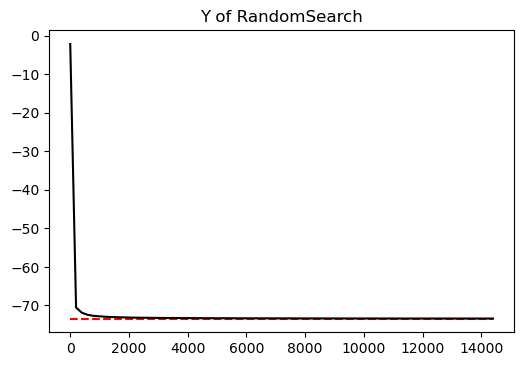

In [310]:
plt.figure(dpi=100)
plt.title("Y of RandomSearch")
plt.plot(n_iter,best_score,c="k")
plt.hlines(np.min(Z),np.min(n_iter),np.max(n_iter),linestyle="--",color="red")
#plt.ylim(-75,-70)
plt.show()